#                                   Logistic Regression on IMDb Dataset

### Step:1 Import necessary libraries

In [7]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc
    )
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### Step:2:Download NLTK resources

In [8]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\2004a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Step:3: Load data and validate

In [9]:
data_frame = pd.read_csv(r"C:\\Users\\2004a\\Documents\\Visual Code\\IBM Project\\New folder\\IMDB Dataset.csv")

if not {"review", "sentiment"}.issubset(data_frame.columns):
    raise ValueError("Dataset must contain 'review' and 'sentiment' columns.")

### Step:4: Preprocessing function

In [10]:
# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r"[^a-z\s]", "", text)
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

# Apply preprocessing
data_frame["review"] = data_frame["review"].apply(preprocess_text)

### Step:5: Training 

In [11]:
# Map sentiments to binary values
data_frame["sentiment"] = data_frame["sentiment"].map({"positive": 1, "negative": 0})

# Slightly increase dataset size for training (use 77% of the data)
data_frame = data_frame.sample(frac=0.77, random_state=42)  # Use 77% of the data

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    data_frame["review"], data_frame["sentiment"], test_size=0.2, random_state=42, stratify=data_frame["sentiment"]
)

# Vectorize text data using TF-IDF with improved settings
vectorizer = TfidfVectorizer(
    max_features=750,  # Slightly increase features
    ngram_range=(1, 1),  # Unigrams only
    min_df=50,  # Reduce rare term threshold
    max_df=0.7,  # Exclude very common words
)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# logistic Regression prediction

In [12]:
# Logistic Regression with slightly reduced regularization
classifier = LogisticRegression(C=0.0001, penalty="l2", solver="liblinear", max_iter=300, random_state=42)
classifier.fit(X_train_vectorized, y_train)

# Predictions
y_pred = classifier.predict(X_test_vectorized)

# Display evaluation metrics
print("\nEvaluation Metrics:")
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")



Evaluation Metrics:
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      3854
           1       0.85      0.67      0.75      3846

    accuracy                           0.78      7700
   macro avg       0.79      0.78      0.77      7700
weighted avg       0.79      0.78      0.77      7700

Accuracy: 0.7761
F1 Score: 0.7733


# visualisation

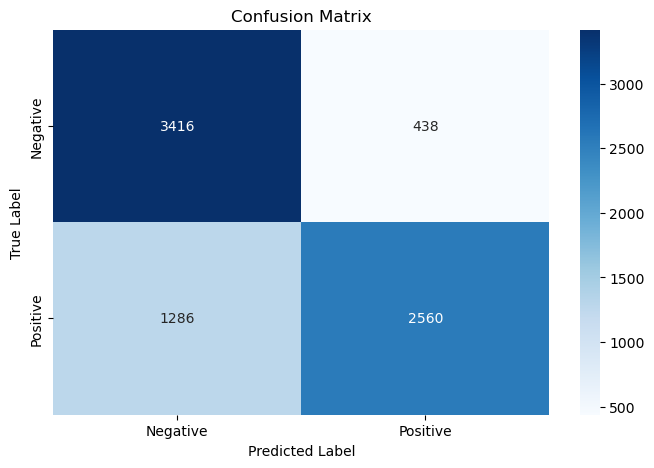

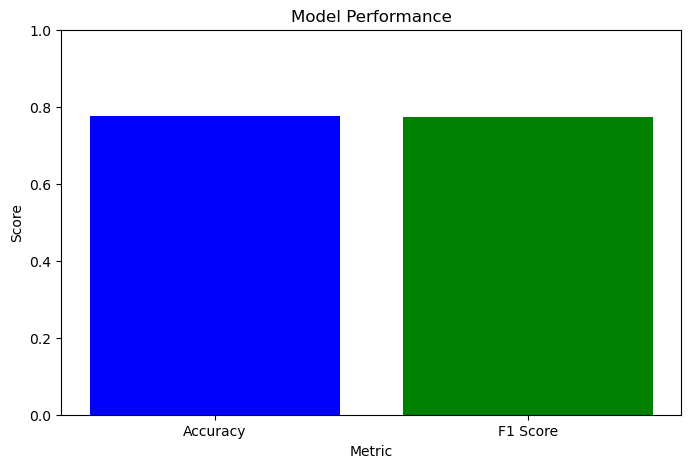

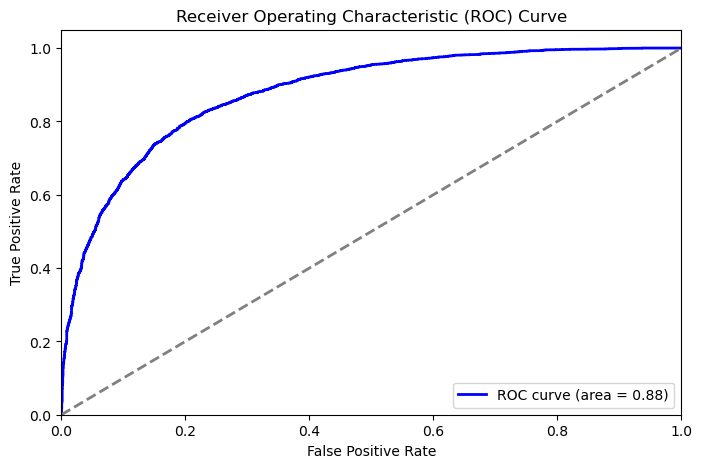

In [13]:
# Visualization
# Confusion Matrix
plt.figure(figsize=(8, 5))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(
    conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"]
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot Accuracy and F1 Score
metrics = ['Accuracy', 'F1 Score']
values = [accuracy, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green'])
plt.ylim(0, 1)
plt.title('Model Performance')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()

# ROC Curve
# Get the probability scores for the positive class (class=1)
y_probs = classifier.predict_proba(X_test_vectorized)[:, 1]

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
